#Panda Intro

In [92]:
import pandas as pd

name = pd.Series(['BMW', 'Porsche', 'Farari'], index=(8,4,2))
name

colors = pd.Series(['Blue', 'Black', 'Red'], index=(8,4,2))
colors

dataf = pd.DataFrame({'Cars' : name, 'Colors' : colors}, index=(8,4,2))
dataf

,Cars,Colors
8,BMW,Blue
4,Porsche,Black
2,Farari,Red


In [93]:
dataf.loc[8] # retrieves from the index specified

Cars       BMW
Colors    Blue
Name: 8, dtype: object

In [94]:
dataf.iloc[0] # retrieves from the position from 0 based indexing

Cars       BMW
Colors    Blue
Name: 8, dtype: object


#Importing Data

In [95]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [96]:
data = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/Udemy ML Course/car_sales.csv')
data.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


#Experiment with data

In [97]:
data.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [98]:
data.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [100]:
data.mean()

<ipython-input-100-abc01cf6c622>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [101]:
data.loc[:2]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"


In [102]:
data['Make']

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [103]:
data.Make

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [104]:
data[data['Make'] == 'Toyota']

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [105]:
data[data['Odometer (KM)'] > 80000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"


In [106]:
pd.crosstab(data['Make'], data['Doors'])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [107]:
pd.crosstab(data['Make'], data['Colour'])

Colour,Black,Blue,Green,Red,White
Make,,,,,
BMW,1,0,0,0,0
Honda,0,2,0,1,0
Nissan,0,0,0,0,2
Toyota,0,1,1,0,2


In [108]:
data.groupby(['Make']).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<AxesSubplot:>

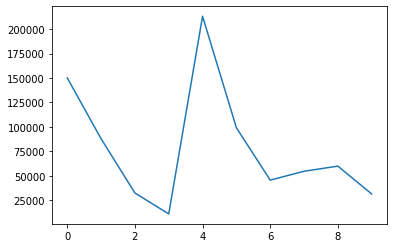

In [109]:
data['Odometer (KM)'].plot()

<AxesSubplot:>

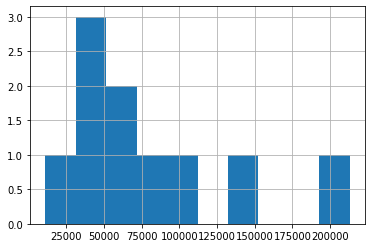

In [110]:
data['Odometer (KM)'].hist()

In [111]:
#converting price from string object ro integer value
data['Price'] = data['Price'].replace('[\$\,\.]', '', regex=True).astype(int)
data['Price'] = data['Price'] / 100
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0


In [112]:
data['Make'].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

#Exporting dataframe

In [113]:
dataf.to_csv('exported_custom.csv', index=False)

#Reading exported csv file

In [114]:
data_exported = pd.read_csv('./exported_custom.csv')
data_exported

,Cars,Colors
0,BMW,Blue
1,Porsche,Black
2,Farari,Red


#Missing data

**Importing**

In [115]:
missing_data = pd.read_csv('/content/gdrive/MyDrive/Machine Learning/Udemy ML Course/car-sales-missing-data.csv')
missing_data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


**Manipulating**

In [116]:
missing_data['Odometer'].fillna(missing_data['Odometer'].mean(), inplace=True)
missing_data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [117]:
#drop row having NaN values only for Doors coloumn
missing_data.dropna(subset=['Doors'], inplace=True)
missing_data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [118]:
#creating new coloumn for car sales
seats = pd.Series([5,5,5,5,5,5])
data['Seats'] = seats
data

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,4000.0,5.0
1,Honda,Red,87899,4,5000.0,5.0
2,Toyota,Blue,32549,3,7000.0,5.0
3,BMW,Black,11179,5,22000.0,5.0
4,Nissan,White,213095,4,3500.0,5.0
5,Toyota,Green,99213,4,4500.0,5.0
6,Honda,Blue,45698,4,7500.0,NaN
7,Honda,Blue,54738,4,7000.0,NaN
8,Toyota,White,60000,4,6250.0,NaN
9,Nissan,White,31600,4,9700.0,NaN


In [119]:
data['Seats'].fillna(5, inplace=True)
data

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,Toyota,White,150043,4,4000.0,5.0
1,Honda,Red,87899,4,5000.0,5.0
2,Toyota,Blue,32549,3,7000.0,5.0
3,BMW,Black,11179,5,22000.0,5.0
4,Nissan,White,213095,4,3500.0,5.0
5,Toyota,Green,99213,4,4500.0,5.0
6,Honda,Blue,45698,4,7500.0,5.0
7,Honda,Blue,54738,4,7000.0,5.0
8,Toyota,White,60000,4,6250.0,5.0
9,Nissan,White,31600,4,9700.0,5.0


In [120]:
# if there is a list then len(list) must eqal to number of rows
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 5.7, 8.9, 5.6, 7.9, 10.1]
data['Fuel per 100KM'] = fuel_economy
data

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM
0,Toyota,White,150043,4,4000.0,5.0,7.5
1,Honda,Red,87899,4,5000.0,5.0,9.2
2,Toyota,Blue,32549,3,7000.0,5.0,5.0
3,BMW,Black,11179,5,22000.0,5.0,9.6
4,Nissan,White,213095,4,3500.0,5.0,8.7
5,Toyota,Green,99213,4,4500.0,5.0,5.7
6,Honda,Blue,45698,4,7500.0,5.0,8.9
7,Honda,Blue,54738,4,7000.0,5.0,5.6
8,Toyota,White,60000,4,6250.0,5.0,7.9
9,Nissan,White,31600,4,9700.0,5.0,10.1


In [121]:
data['Total fuel used'] = data['Odometer (KM)']/100 * data['Fuel per 100KM']
data

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265
5,Toyota,Green,99213,4,4500.0,5.0,5.7,5655.141
6,Honda,Blue,45698,4,7500.0,5.0,8.9,4067.122
7,Honda,Blue,54738,4,7000.0,5.0,5.6,3065.328
8,Toyota,White,60000,4,6250.0,5.0,7.9,4740.000
9,Nissan,White,31600,4,9700.0,5.0,10.1,3191.600


In [122]:
data.rename(columns = {'Total fuel used' : 'Total Fuel Used (L)'}, inplace = True)
data

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total Fuel Used (L)
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265
5,Toyota,Green,99213,4,4500.0,5.0,5.7,5655.141
6,Honda,Blue,45698,4,7500.0,5.0,8.9,4067.122
7,Honda,Blue,54738,4,7000.0,5.0,5.6,3065.328
8,Toyota,White,60000,4,6250.0,5.0,7.9,4740.000
9,Nissan,White,31600,4,9700.0,5.0,10.1,3191.600


In [123]:
data['Wheels'] = 4
data

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total Fuel Used (L),Wheels
0,Toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4
1,Honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4
3,BMW,Black,11179,5,22000.0,5.0,9.6,1073.184,4
4,Nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4
5,Toyota,Green,99213,4,4500.0,5.0,5.7,5655.141,4
6,Honda,Blue,45698,4,7500.0,5.0,8.9,4067.122,4
7,Honda,Blue,54738,4,7000.0,5.0,5.6,3065.328,4
8,Toyota,White,60000,4,6250.0,5.0,7.9,4740.000,4
9,Nissan,White,31600,4,9700.0,5.0,10.1,3191.600,4


In [124]:
data.drop('Total Fuel Used (L)', axis = 1, inplace = True)
data

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Wheels
0,Toyota,White,150043,4,4000.0,5.0,7.5,4
1,Honda,Red,87899,4,5000.0,5.0,9.2,4
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,4
3,BMW,Black,11179,5,22000.0,5.0,9.6,4
4,Nissan,White,213095,4,3500.0,5.0,8.7,4
5,Toyota,Green,99213,4,4500.0,5.0,5.7,4
6,Honda,Blue,45698,4,7500.0,5.0,8.9,4
7,Honda,Blue,54738,4,7000.0,5.0,5.6,4
8,Toyota,White,60000,4,6250.0,5.0,7.9,4
9,Nissan,White,31600,4,9700.0,5.0,10.1,4


In [125]:
white_idx = data.index[data['Colour'] == 'White']
data.drop(white_idx, axis = 0)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Wheels
1,Honda,Red,87899,4,5000.0,5.0,9.2,4
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,4
3,BMW,Black,11179,5,22000.0,5.0,9.6,4
5,Toyota,Green,99213,4,4500.0,5.0,5.7,4
6,Honda,Blue,45698,4,7500.0,5.0,8.9,4
7,Honda,Blue,54738,4,7000.0,5.0,5.6,4


In [132]:
data_shuffle = data.sample(frac=1)
data_shuffle

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Wheels
4,Nissan,White,213095,4,3500.0,5.0,8.7,4
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,4
0,Toyota,White,150043,4,4000.0,5.0,7.5,4
8,Toyota,White,60000,4,6250.0,5.0,7.9,4
1,Honda,Red,87899,4,5000.0,5.0,9.2,4
5,Toyota,Green,99213,4,4500.0,5.0,5.7,4
9,Nissan,White,31600,4,9700.0,5.0,10.1,4
3,BMW,Black,11179,5,22000.0,5.0,9.6,4
6,Honda,Blue,45698,4,7500.0,5.0,8.9,4
7,Honda,Blue,54738,4,7000.0,5.0,5.6,4


In [134]:
data_shuffle.reset_index(drop=True, inplace=True)
data_shuffle

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Wheels
0,Nissan,White,213095,4,3500.0,5.0,8.7,4
1,Toyota,Blue,32549,3,7000.0,5.0,5.0,4
2,Toyota,White,150043,4,4000.0,5.0,7.5,4
3,Toyota,White,60000,4,6250.0,5.0,7.9,4
4,Honda,Red,87899,4,5000.0,5.0,9.2,4
5,Toyota,Green,99213,4,4500.0,5.0,5.7,4
6,Nissan,White,31600,4,9700.0,5.0,10.1,4
7,BMW,Black,11179,5,22000.0,5.0,9.6,4
8,Honda,Blue,45698,4,7500.0,5.0,8.9,4
9,Honda,Blue,54738,4,7000.0,5.0,5.6,4


In [140]:
def km_to_mile(x):
  return x/1.6

data['Odometer (Mile)'] = data['Odometer (KM)'].apply(km_to_mile)
data


,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Wheels,Odometer (Mile)
0,Toyota,White,150043,4,4000.0,5.0,7.5,4,93776.875
1,Honda,Red,87899,4,5000.0,5.0,9.2,4,54936.875
2,Toyota,Blue,32549,3,7000.0,5.0,5.0,4,20343.125
3,BMW,Black,11179,5,22000.0,5.0,9.6,4,6986.875
4,Nissan,White,213095,4,3500.0,5.0,8.7,4,133184.375
5,Toyota,Green,99213,4,4500.0,5.0,5.7,4,62008.125
6,Honda,Blue,45698,4,7500.0,5.0,8.9,4,28561.250
7,Honda,Blue,54738,4,7000.0,5.0,5.6,4,34211.250
8,Toyota,White,60000,4,6250.0,5.0,7.9,4,37500.000
9,Nissan,White,31600,4,9700.0,5.0,10.1,4,19750.000
